In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data.csv', encoding_errors= 'replace')

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [172]:
df.shape

df.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)

df.rename(columns={'v1':'Target', 'v2':'Text'}, inplace=True)

df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [173]:
df.describe()

,Target,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [174]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
encoded = LE.fit_transform(df['Target'])

df['Target'] = encoded

df

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [175]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [176]:
df = df.drop_duplicates(keep='first')

df.shape

(5169, 2)

# EDA

In [177]:
df['text_len'] = df['Text'].apply(len)

df['Target'].value_counts()/len(df)*100

C:\Users\dasad\AppData\Local\Temp/ipykernel_16424/2566685137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_len'] = df['Text'].apply(len)


0    87.366996
1    12.633004
Name: Target, dtype: float64

([<matplotlib.patches.Wedge at 0x1445263e0d0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

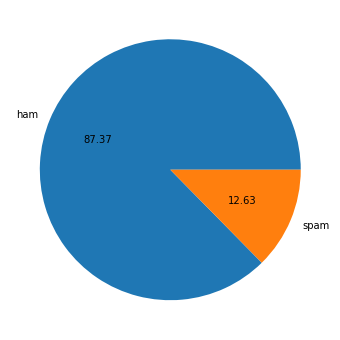

In [178]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.pie(df['Target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')

In [179]:
# Data is imbalanced
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dasad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [180]:
df['word_length'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

df['sentence_length']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

df

C:\Users\dasad\AppData\Local\Temp/ipykernel_16424/4059797799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_length'] = df['Text'].apply(lambda x: len(nltk.word_tokenize(x)))
C:\Users\dasad\AppData\Local\Temp/ipykernel_16424/4059797799.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentence_length']=df['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))


,Target,Text,text_len,word_length,sentence_length
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [181]:
df[['text_len','word_length','sentence_length']].describe()

,text_len,word_length,sentence_length
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<AxesSubplot:xlabel='sentence_length', ylabel='Count'>

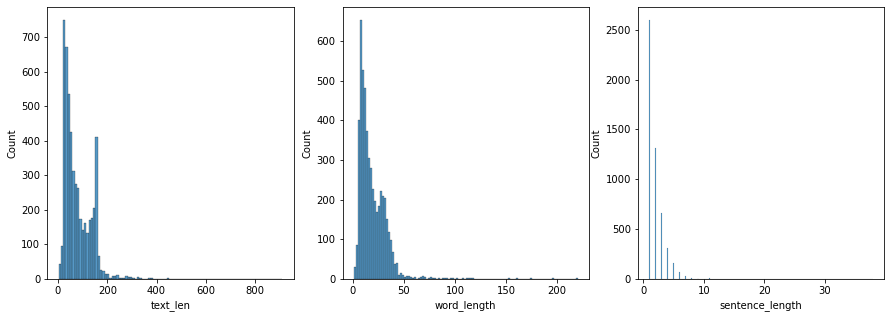

In [182]:
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df['text_len'])


plt.subplot(1,3,2)
sns.histplot(df['word_length'])



plt.subplot(1,3,3)
sns.histplot(df['sentence_length'])

In [183]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

In [184]:
df[df['Target'] == 0][['text_len','word_length','sentence_length']].describe()

,text_len,word_length,sentence_length
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [185]:
df[df['Target'] == 1][['text_len','word_length','sentence_length']].describe()

,text_len,word_length,sentence_length
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot:xlabel='text_len', ylabel='Count'>

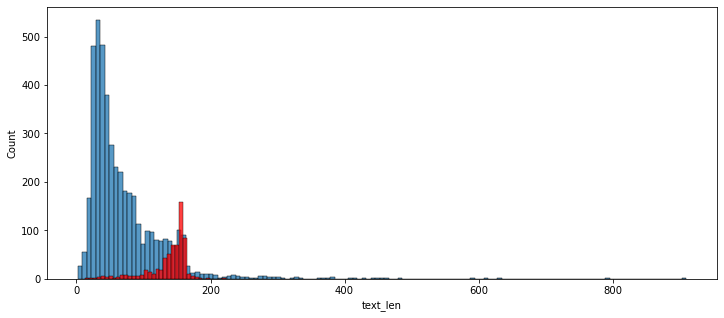

In [186]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['Target'] ==0]['text_len'])
sns.histplot(df[df['Target'] ==1]['text_len'], color='red')

<AxesSubplot:xlabel='word_length', ylabel='Count'>

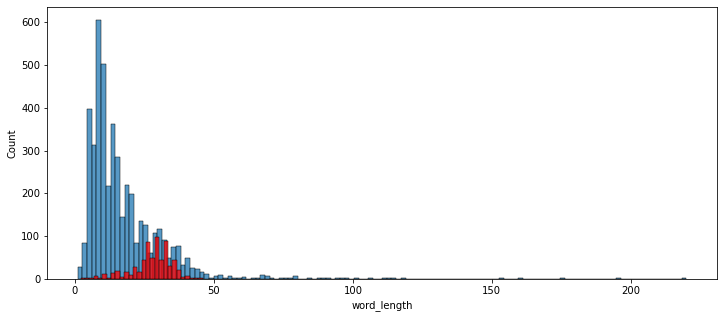

In [187]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['Target'] ==0]['word_length'])
sns.histplot(df[df['Target'] ==1]['word_length'], color='red')

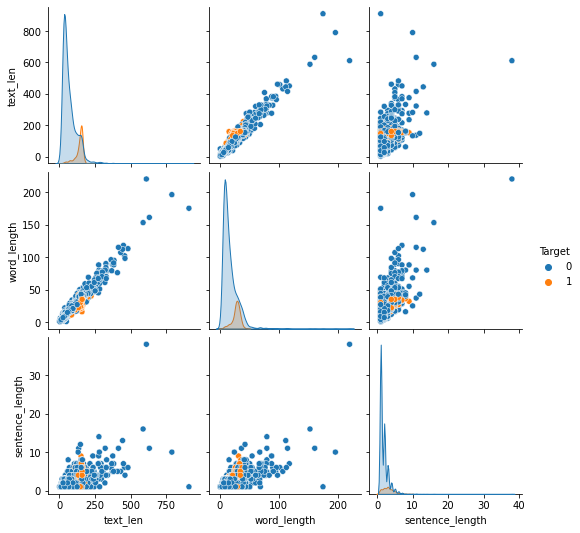

In [188]:
sns.pairplot(df, hue='Target')

<AxesSubplot:>

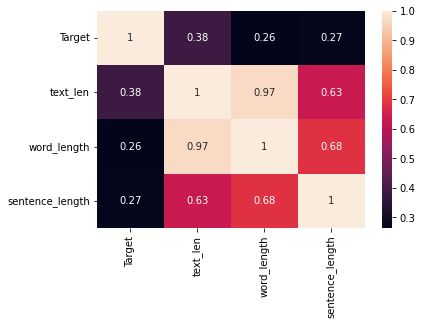

In [189]:
sns.heatmap(df.corr(), annot=True)

In [190]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [191]:
from nltk.corpus import stopwords
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [192]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

## Data preprocessing

In [193]:
def text_transform(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
     
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
        
    return " ".join(y)       

df['Transformed_text'] = df['Text'].apply(lambda x: text_transform(x))

C:\Users\dasad\AppData\Local\Temp/ipykernel_16424/3642455056.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transformed_text'] = df['Text'].apply(lambda x: text_transform(x))


In [194]:
# pip install wordcloud

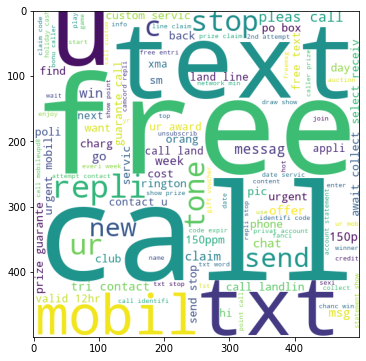

In [195]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height = 500, background_color='white', min_font_size=10 )

spam_wc = wc.generate(df[df['Target'] == 1]['Transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

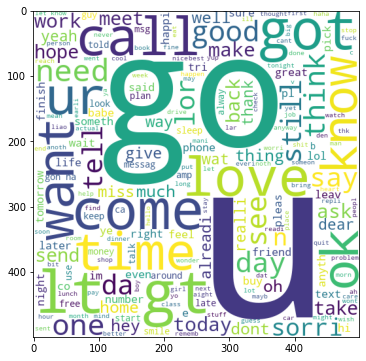

In [145]:
ham_wc = wc.generate(df[df['Target'] == 0]['Transformed_text'].str.cat(sep=" "))

plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [86]:
# TOP 30 words

C:\Users\dasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

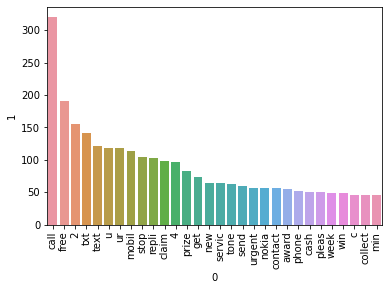

In [196]:
corpus_spam = []
for msg in df[df['Target']==1]['Transformed_text'].tolist():
    for word in msg.split():
        corpus_spam.append(word)
        

from collections import Counter
sns.barplot(pd.DataFrame(Counter(corpus_spam).most_common(30))[0], pd.DataFrame(Counter(corpus_spam).most_common(30))[1])
plt.xticks(rotation = 'vertical')

In [197]:
df.head()

,Target,Text,text_len,word_length,sentence_length,Transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [198]:
df['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

C:\Users\dasad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

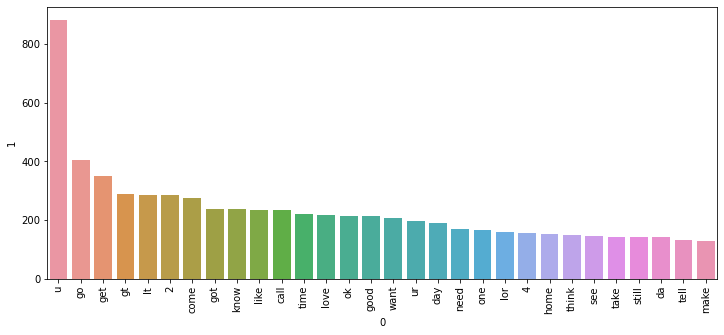

In [199]:
corpus_ham = []

for msg in df[df['Target'] == 0]["Transformed_text"].tolist():
    for i in msg.split():
        corpus_ham.append(i)
    

plt.figure(figsize=(12,5))
plt.xticks(rotation = 'vertical')
sns.barplot(pd.DataFrame(Counter(corpus_ham).most_common(30))[0], pd.DataFrame(Counter(corpus_ham).most_common(30))[1])

In [210]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [211]:
X = tfidf.fit_transform(df['Transformed_text']).toarray()

y = df['Target'].values

y.shape

(5169,)

In [212]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train.shape

y_train.shape

(4135,)

In [213]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(X_train, y_train)
ypred1 =  gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test,ypred1)
confusion_gnb = confusion_matrix(y_test,ypred1)
precision_gnb = precision_score(y_test,ypred1)
print('\n')
mnb.fit(X_train, y_train)
ypred2 =  mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test,ypred2)
confusion_mnb = confusion_matrix(y_test,ypred2)
precision_mnb = precision_score(y_test,ypred2)
print('\n')
bnb.fit(X_train, y_train)
ypred3 =  bnb.predict(X_test)
accuracy_bnb = accuracy_score(y_test,ypred3)
confusion_bnb =confusion_matrix(y_test,ypred3)
precision_bnb =precision_score(y_test,ypred3)

In [214]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predict_random = rf.predict(X_test)

accuracy_random = accuracy_score(y_test, predict_random)
precision_random = precision_score(y_test, predict_random)
confusion_random  = confusion_matrix(y_test, predict_random)


# EXTRATREE CLASSIFIER
from sklearn.ensemble import ExtraTreesClassifier
ETC = ExtraTreesClassifier()
ETC.fit(X_train, y_train)
predict_ETree = ETC.predict(X_test)

accuracy_ETC = accuracy_score(y_test, predict_ETree)
precision_ETC = precision_score(y_test, predict_ETree)
confusion_ETC = confusion_matrix(y_test, predict_ETree)

In [215]:
data = {
    'Model':['GNB', 'MNB', 'BNB','Random',"ETREE"],
    'Accuracy':[accuracy_gnb,accuracy_mnb,accuracy_bnb,accuracy_random,accuracy_ETC],
    'Confusion_metrices':[confusion_gnb, confusion_mnb,confusion_bnb,confusion_random,confusion_ETC],
    'Precision' :[precision_gnb,precision_mnb,precision_bnb,precision_random,precision_ETC]
}

In [216]:
pd.DataFrame(data)

,Model,Accuracy,Confusion_metrices,Precision
0,GNB,0.870406,"[[788, 108], [26, 112]]",0.509091
1,MNB,0.971954,"[[896, 0], [29, 109]]",1.000000
2,BNB,0.983559,"[[895, 1], [16, 122]]",0.991870
3,Random,0.978723,"[[894, 2], [20, 118]]",0.983333
4,ETREE,0.977756,"[[893, 3], [20, 118]]",0.975207


In [218]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))